In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data[data.duplicated()].shape

(0, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x26baa61cd60>,
 'caps': [<matplotlib.lines.Line2D at 0x26baa62b4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26baa61c9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x26baa62bbe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x26baa62bf70>,
 'means': []}

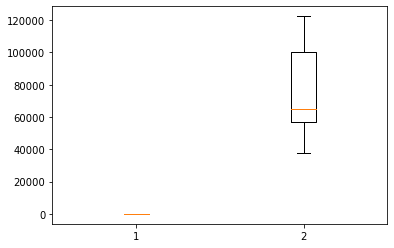

In [25]:
plt.boxplot(data)


C:\Users\Rakshith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

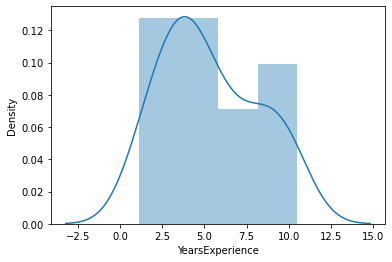

In [8]:
import seaborn as sns
sns.distplot(data['YearsExperience'])


C:\Users\Rakshith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

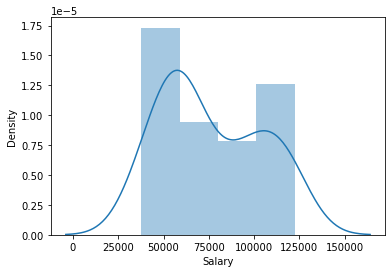

In [9]:
sns.distplot(data['Salary'])

In [10]:
#mean imputation
mean=data.mean()
print(mean)

YearsExperience        5.313333
Salary             76003.000000
dtype: float64


In [11]:
median=data.median()
print(median)

YearsExperience        4.7
Salary             65237.0
dtype: float64


In [12]:
import statsmodels.formula.api as smf
X=data.rename(columns={'YearsExperience':'A','Salary':'B'},inplace= True)
model = smf.ols("B~A",data=data).fit()

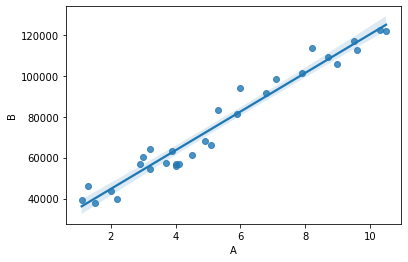

In [13]:
sns.regplot(x='A', y='B', data=data);

In [14]:
model.params

Intercept    25792.200199
A             9449.962321
dtype: float64

In [15]:
#y= Bo+B1*x ->Regression equation
#Expected salary=  25792.200199+9449.962321*Yearsexperience

In [16]:
(model.rsquared)

0.9569566641435086

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
A            24.950094
dtype: float64 
 Intercept    5.511950e-12
A            1.143068e-20
dtype: float64


In [20]:
#Prediciting the delivery time for various sorting time

d1=pd.Series([0.5,1,2,3,4,5,6,7,8,9])
Pred_data=pd.DataFrame(d1,columns=['A'])
model.predict(Pred_data)

0     30517.181359
1     35242.162520
2     44692.124842
3     54142.087163
4     63592.049484
5     73042.011806
6     82491.974127
7     91941.936449
8    101391.898770
9    110841.861092
dtype: float64